# $11^{th}$ excercise

In [25]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

import numpy as np

In [26]:
# target parameters of f(x) = m*x + b
m = 2 
b = 1 

In [67]:
import pandas as pd
sigmas = np.array([0.,0.1,1])
ntrains = np.linspace(100,1000,3,dtype=int)
epochss = np.linspace(10,100,3,dtype=int)
df = pd.DataFrame({'sigma': sigmas, 'N_train':ntrains, 'N_epochs': epochss})

Voglio plottare: m_model - m, b_model -b -> 2, 27 pti ognuna
Loss functions: -> 27 grafici -> faccio script che stampa 3 grafici in cui una quantità varia e le altre sono fisse

One should consider the following blocks as interactive. Our script produced 27 datasets of Train/Validation loss in function of epochs. Referring to the following table:

One is able to choose one of those three quantities using their column name and then fix a value for the other two quantities using their row index. The block will produce 3 output graphs of the loss functions where the chosen quantity is different in each graph, while the ohter two are fixed to the selected values.

In [50]:
def TestParameters():
    deltaepochss=np.ones(len(epochss))*epochss[0]
    for i in range(len(epochss)-1):
        deltaepochss[i+1]=epochss[i+1]-epochss[i] 
    print("Epochs delta: ",deltaepochss)
        
    # open and clear output files
    fout_m = open("out/111-m_diff.csv","a")
    fout_b = open("out/111-b_diff.csv","a")
    fout_m.truncate(0)
    fout_b.truncate(0)

    for ntrain in ntrains:
        nvalid = ntrain // 10
        np.random.seed(0)
        tf.random.set_seed(0)
        #creating training and validation datasets
        x_train = np.random.uniform(-1, 1, ntrain)
        x_valid = np.random.uniform(-1, 1, nvalid)
        x_valid.sort()
        y_target = m * x_valid + b 

        for sigma in sigmas:
            np.random.seed(0)
            tf.random.set_seed(0)
            y_train = np.random.normal(m * x_train + b, sigma) 
            y_valid = np.random.normal(m * x_valid + b, sigma) 
            #creating and compiling the model
            model = tf.keras.Sequential()
            model.add(Dense(1, input_shape=(1,)))
            model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
            
            df=pd.DataFrame()
            
            for epochs in epochss:
                #optimizing the model
                ## model.fit(epochs=20)=four calls of
                ## model.fit(epochs=5)
                history = model.fit(x=x_train, y=y_train, 
                                    batch_size=32, 
                                    epochs=epochs,
                                    shuffle=True, 
                                    validation_data=(x_valid, y_valid))        
                df=pd.concat([df,pd.DataFrame(history.history)])
                
                # output
                mb = model.get_weights()

                printm=str(mb[0]-m)[2:-2]
                printb=str(mb[1]-b)[1:-1] #don't want brackets in final string
                fout_m.write(printm+"\n")
                fout_b.write(printb+"\n")
            
            path_history="out/111-ntrain="+str(ntrain)+"-sigma="+str(sigma)+".csv"
            with open(path_history, mode='w') as file:
                df.to_csv(file)
            print()
                


In [51]:
RERUN=False
if(RERUN):
    TestParameters()

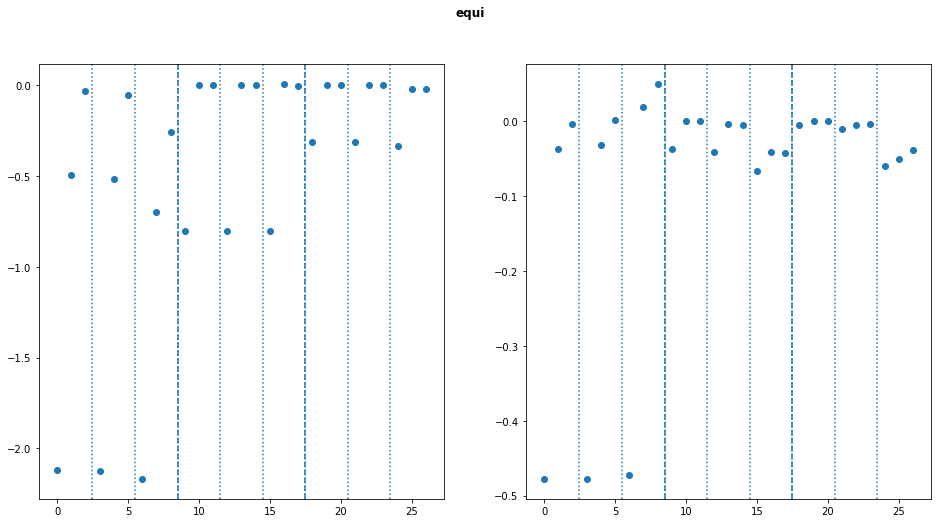

In [65]:
import matplotlib.pyplot as plt
m=np.loadtxt("out/111-m_diff.csv", usecols=(0), unpack=True )
b=np.loadtxt("out/111-b_diff.csv", usecols=(0), unpack=True )
x=np.arange(0,len(m))


fig=plt.figure(figsize=(16, 8))
plt.suptitle('equi', weight='bold')
plt.subplot(121)
plt.scatter(x,m)
for l in np.arange(2.5,len(m)-3,3):
    plt.axvline(l,ls=":")
for l in np.arange(8.5,len(m)-9,9):
    plt.axvline(l,ls="--")

plt.subplot(122)
plt.scatter(x,b)
for l in np.arange(2.5,len(m)-3,3):
    plt.axvline(l,ls=":")
for l in np.arange(8.5,len(m)-9,9):
    plt.axvline(l,ls="--")



each point refers to a different epochs
dotted box: data of different ntrains
dashed box: data of different sigmas

In [68]:
display(df)

,sigma,N_train,N_epochs
0,0.0,100,10
1,0.1,550,55
2,1.0,1000,100


In [ ]:
fix = "sigma"
at_value = 0

path="out/111-ntrain="+str(ntrain)+"-sigma="+str(sigma)+".csv"
